# Predicting Customer Churn Using Machine Learning

This notebook explores the use of Python-based machine learning and data to build a predictive model for customer churn in a telecom service.

We will be following this approach:


## 1. Problem Definition

### In a statement:
>Given the customer's data, can we predict whether or not the customer will churn from the service?

## 2. Data
The original data is sourced from Kaggle (https://www.kaggle.com/datasets/barun2104/telecom-churn/data).

Content:
This dataset contains customer-level information for a telecom company, with various attributes related to the services used recorded for each customer.

## 3. Evaluation
We aim to achieve at least 85% accuracy in predicting whether the customer will churn or not.

## 4. Features



Data Dictionary:

Churn: 1 if the customer canceled the service, 0 if not.

Contract Renewal: 1 if the customer recently renewed the contract, 0 if not.

Data Plan: 1 if the customer has a data plan, 0 if not.

Data Usage: Gigabytes of monthly data usage.

CustServ Calls: Number of calls to customer service.

Day Mins: Average daytime minutes per month.

Day Calls: Average number of daytime calls.

Monthly Charge: Average monthly bill.

Overage Fee: Largest overage fee in the last 12 months.

Roam Mins: Average number of roaming minutes.

## Setting Up the Tools

We'll be utilizing Pandas, Matplotlib, and NumPy for the analysis and manipulation of our data.

In [1]:
# Importing necessary libraries for exploratory data analysis (EDA) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside the notebook
%matplotlib inline

# Importing machine learning models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing tools for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv("telecom_churn.csv")

# Displaying the shape of the DataFrame
print("DataFrame Shape:", df.shape)

DataFrame Shape: (3333, 11)


## Data Exploration (Exploratory Data Analysis)

During this phase, our objectives are to delve into the data and address the following:

1. **What problems or questions are we aiming to solve?**

2. **What types of data are at our disposal, and how do we handle different data types?**

3. **How do we identify and manage missing data?**

4. **Why should we be attentive to outliers, and where do they exist in the data?**

5. **In what ways can we enhance the value of our data by adding, modifying, or removing features?**

In [3]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [5]:
# lets find out how many of each class there
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [7]:
# Display the percentage distribution
churn_percentage = df["Churn"].value_counts(normalize=True) * 100
print("Churn Percentage:\n", churn_percentage)

Churn Percentage:
 0    85.508551
1    14.491449
Name: Churn, dtype: float64


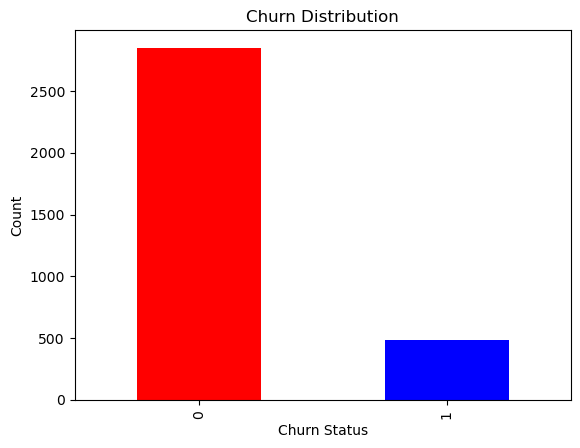

In [8]:
# Plotting the bar chart with specified colors
df["Churn"].value_counts().plot(kind="bar", color=["red", "blue"])

# Adding title and labels for better clarity
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Displaying the plot
plt.show()

In [9]:
# Displaying concise information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [10]:
# Checking for missing values and displaying the count for each column
print("Missing Values:\n", df.isna().sum())

Missing Values:
 Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [11]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Churn frequency according to Contract Renewal

In [12]:
# Displaying the count of unique values in the "ContractRenewal" column
print("Contract Renewal Counts:\n", df.ContractRenewal.value_counts())

Contract Renewal Counts:
 1    3010
0     323
Name: ContractRenewal, dtype: int64


In [13]:
# Displaying the cross-tabulation table for Churn and ContractRenewal
print("Churn vs. Contract Renewal Cross-Tabulation:\n", pd.crosstab(df.Churn, df.ContractRenewal))


Churn vs. Contract Renewal Cross-Tabulation:
 ContractRenewal    0     1
Churn                     
0                186  2664
1                137   346


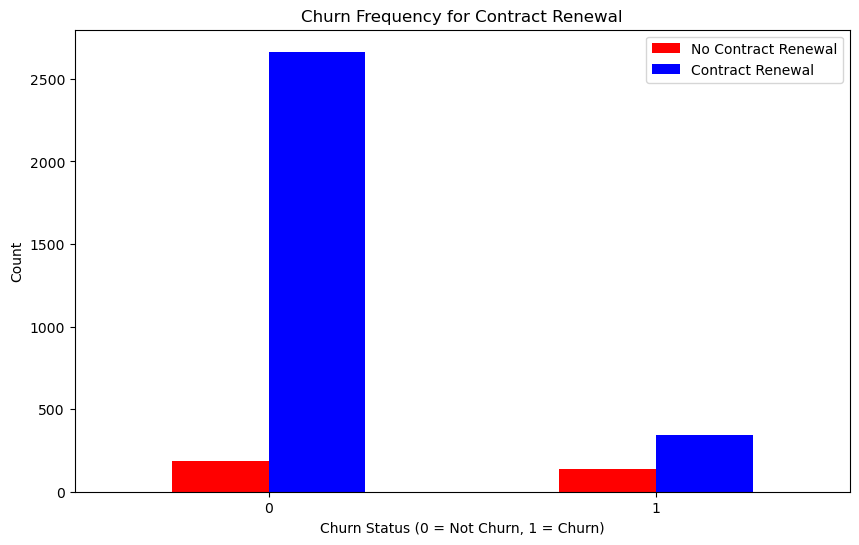

In [14]:
# Create a bar plot based on the cross-tabulation of Churn and ContractRenewal
pd.crosstab(df.Churn, df.ContractRenewal).plot(kind="bar", figsize=(10, 6), color=["red", "blue"])

# Adding title and labels for better clarity
plt.title("Churn Frequency for Contract Renewal")
plt.xlabel("Churn Status (0 = Not Churn, 1 = Churn)")
plt.ylabel("Count")
plt.legend(["No Contract Renewal", "Contract Renewal"])
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()


In [15]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [16]:
# Displaying the count of unique values in the "DayMins" column
print("DayMins Value Counts:\n", df["DayMins"].value_counts())

DayMins Value Counts:
 154.0    8
159.5    8
174.5    8
183.4    7
175.4    7
        ..
78.6     1
200.9    1
254.3    1
247.0    1
180.8    1
Name: DayMins, Length: 1667, dtype: int64


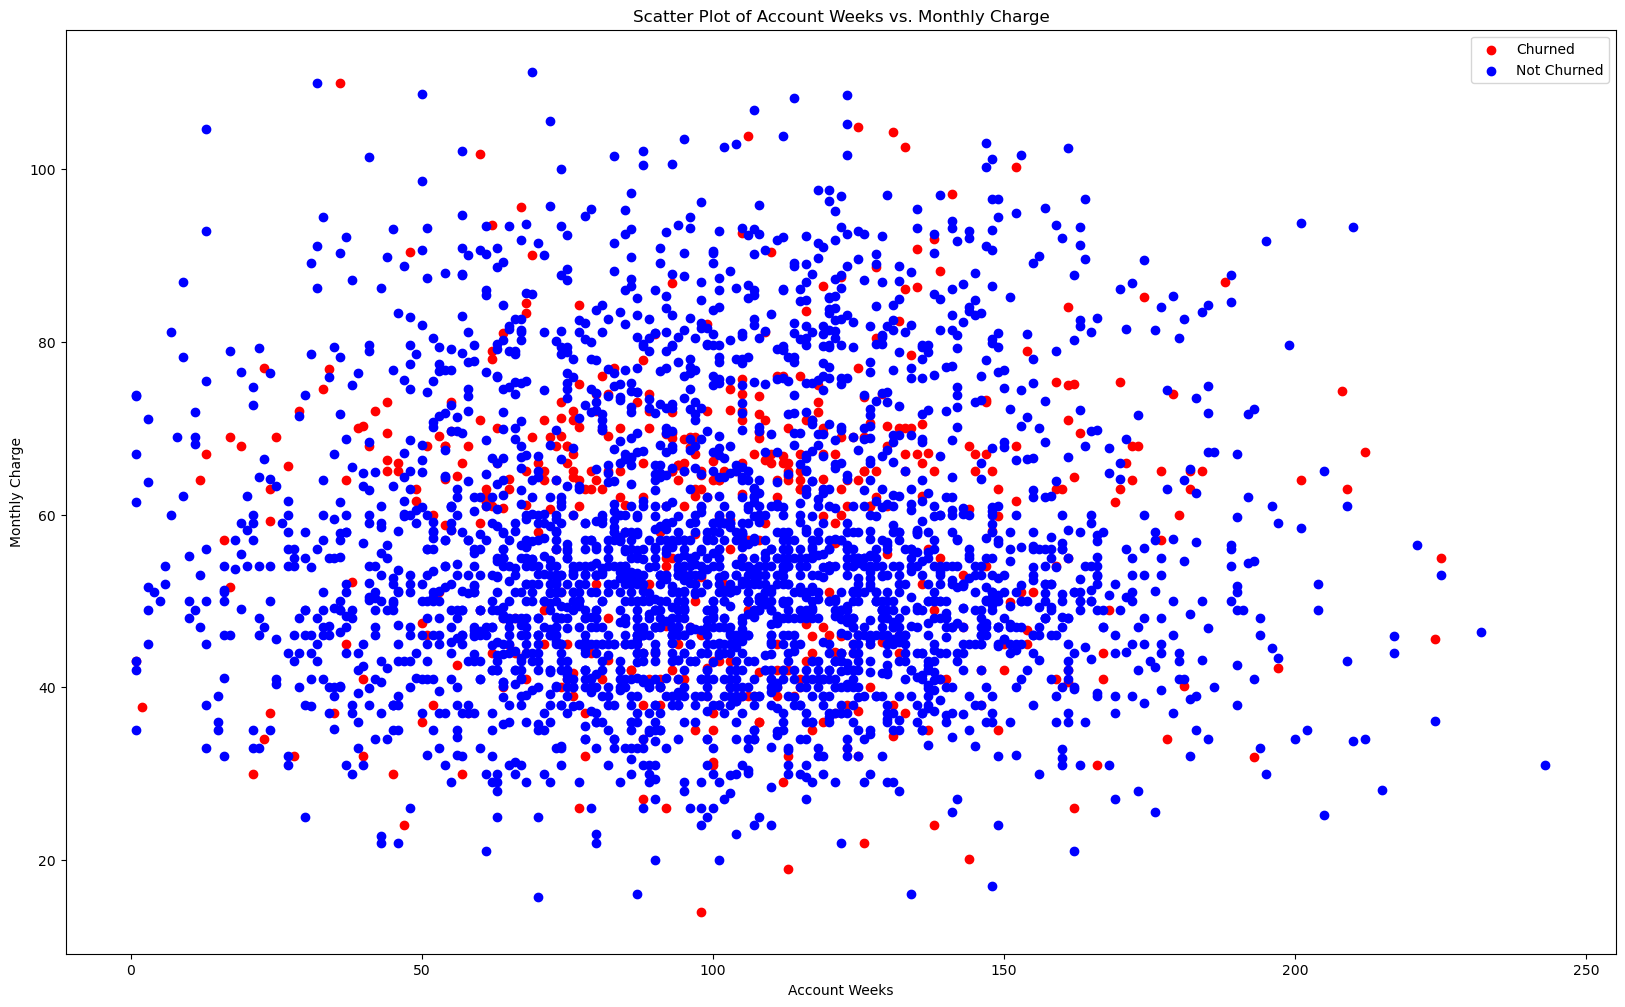

In [17]:
# Create a figure for the scatter plot
plt.figure(figsize=(20, 12))

# Scatter plot for positive examples (Churned)
plt.scatter(df.AccountWeeks[df.Churn == 1],
            df.MonthlyCharge[df.Churn == 1],
            c="red", label="Churned")

# Scatter plot for negative examples (Not Churned)
plt.scatter(df.AccountWeeks[df.Churn == 0],
            df.MonthlyCharge[df.Churn == 0],
            c="blue", label="Not Churned")

# Adding labels and title for better clarity
plt.title("Scatter Plot of Account Weeks vs. Monthly Charge")
plt.xlabel("Account Weeks")
plt.ylabel("Monthly Charge")
plt.legend()  # Display legend for color differentiation

# Display the scatter plot
plt.show()

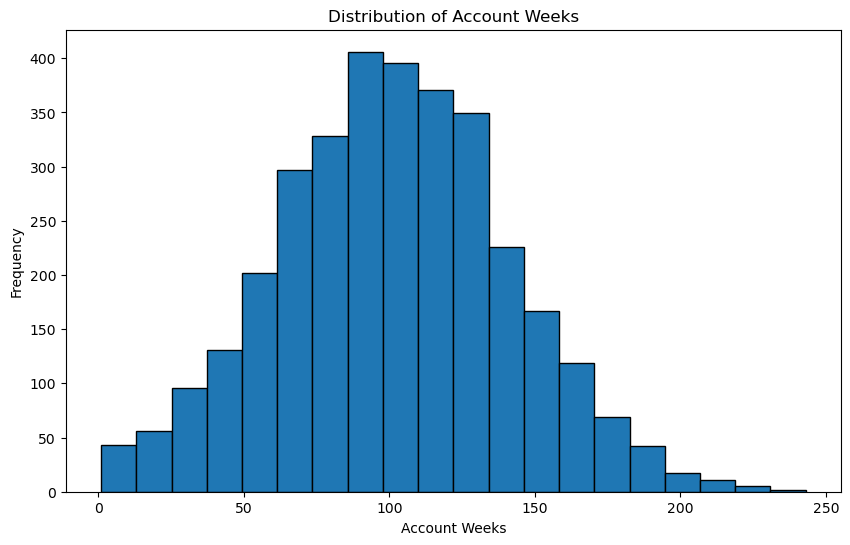

In [18]:
# Create a histogram for the distribution of Account Weeks
df.AccountWeeks.plot.hist(bins=20, edgecolor='black', figsize=(10, 6))

# Adding labels and title for better clarity
plt.title("Distribution of Account Weeks")
plt.xlabel("Account Weeks")
plt.ylabel("Frequency")

# Display the histogram
plt.show()

In [19]:
# Displaying the cross-tabulation table for DataPlan and Churn
print("Cross-Tabulation of DataPlan vs. Churn:\n", pd.crosstab(df.DataPlan, df.Churn))

Cross-Tabulation of DataPlan vs. Churn:
 Churn        0    1
DataPlan           
0         2008  403
1          842   80


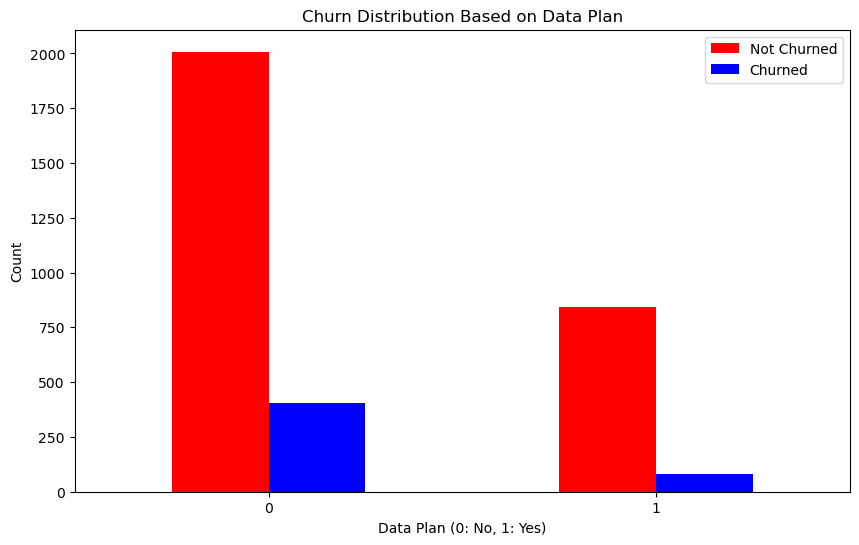

In [20]:
# Create a bar plot based on the cross-tabulation of DataPlan and Churn
pd.crosstab(df.DataPlan, df.Churn).plot(kind="bar", figsize=(10, 6), color=["red", "blue"])

# Adding labels and title for better clarity
plt.title("Churn Distribution Based on Data Plan")
plt.xlabel("Data Plan (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(["Not Churned", "Churned"])
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()

In [21]:
# Make a correlation matrix
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


Correlation Matrix:
                     Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
Churn            1.000000      0.016541        -0.259852 -0.102148  -0.087195   
AccountWeeks     0.016541      1.000000        -0.024735  0.002918   0.014391   
ContractRenewal -0.259852     -0.024735         1.000000 -0.006006  -0.019223   
DataPlan        -0.102148      0.002918        -0.006006  1.000000   0.945982   
DataUsage       -0.087195      0.014391        -0.019223  0.945982   1.000000   
CustServCalls    0.208750     -0.003796         0.024522 -0.017824  -0.021723   
DayMins          0.205151      0.006216        -0.049396 -0.001684   0.003176   
DayCalls         0.018459      0.038470        -0.003755 -0.011086  -0.007962   
MonthlyCharge    0.072313      0.012581        -0.047291  0.737490   0.781660   
OverageFee       0.092812     -0.006749        -0.019105  0.021526   0.019637   
RoamMins         0.068239      0.009514        -0.045871 -0.001318   0.162746   

      

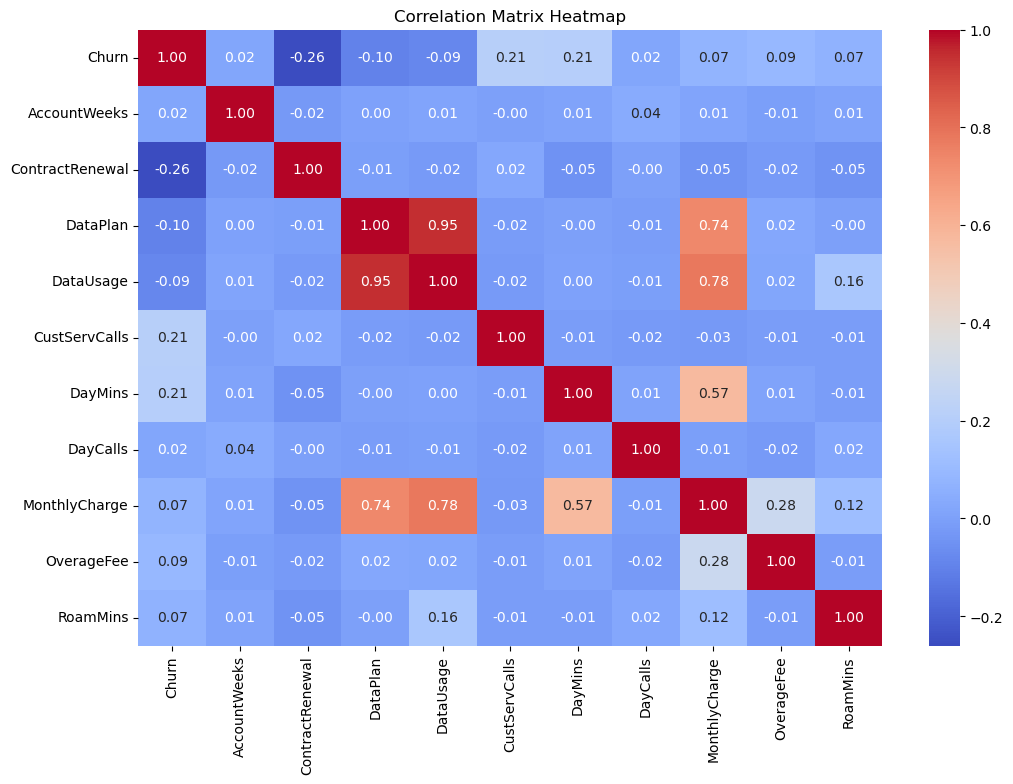

In [22]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

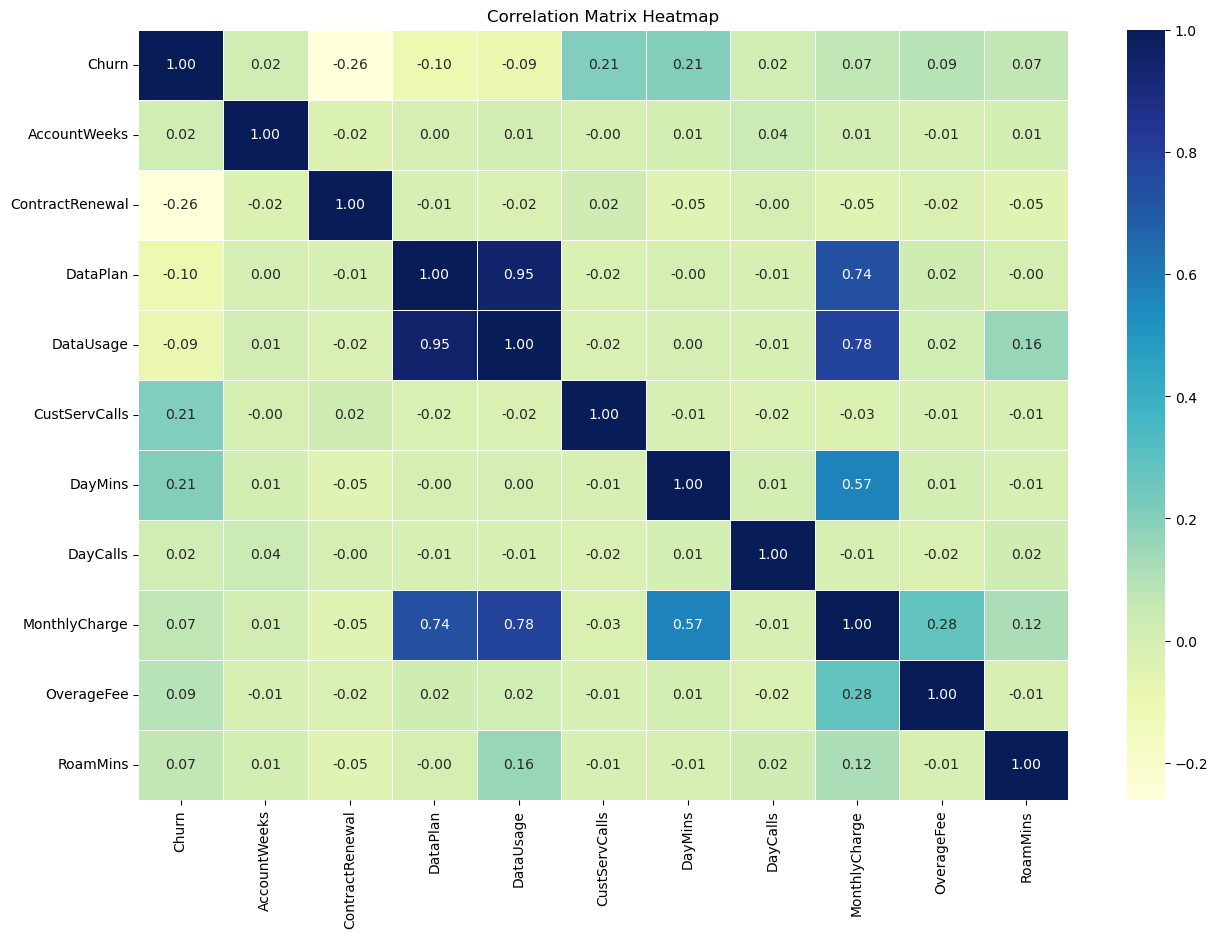

In [23]:
# Create a correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

# Adding a title
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()

# 5. Modelling

In [24]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [25]:
# Split the data into features (X) and the target variable (y)
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [26]:
x

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [28]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
X_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
817,243,1,0,0.00,2,95.5,92,31.0,8.19,6.6
1373,108,1,0,0.00,4,112.0,105,36.0,9.69,4.1
679,75,0,0,0.00,1,222.4,78,66.0,16.35,8.7
56,141,1,0,0.00,1,126.9,98,37.0,9.00,8.0
1993,86,1,0,0.35,0,216.3,96,63.5,13.32,4.5
...,...,...,...,...,...,...,...,...,...,...
1095,106,1,0,0.00,1,274.4,120,64.0,9.93,6.0
1130,122,1,0,0.00,1,35.1,62,22.0,9.04,12.7
1294,66,1,0,0.24,1,87.6,76,40.4,13.10,9.2
860,169,1,0,0.00,2,179.2,111,46.0,8.76,9.9


In [30]:
y_train, len(y_train)

(817     0
 1373    1
 679     1
 56      0
 1993    0
        ..
 1095    0
 1130    0
 1294    0
 860     0
 3174    0
 Name: Churn, Length: 2666, dtype: int64,
 2666)


Now that we have divided our data into training and test sets, it's time to construct machine learning models. The training set will be used to train the models, and their performance will be assessed on the test set. We will explore three distinct models:

1 Logistic Regression

2 K-Nearest Neighbor Classifier

3 Random Forest Classifier
 

In [31]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates multiple machine learning models.

    Parameters:
    - models (dict): A dictionary of machine learning models.
    - X_train, X_test: Feature matrices for training and testing.
    - y_train, y_test: Target variables for training and testing.

    Returns:
    - model_scores (dict): A dictionary with model names as keys and corresponding scores as values.
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores

C:\Users\heych\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8470764617691154,
 'KNN': 0.8740629685157422,
 'Random Forest': 0.9265367316341829}

## Models comparison 

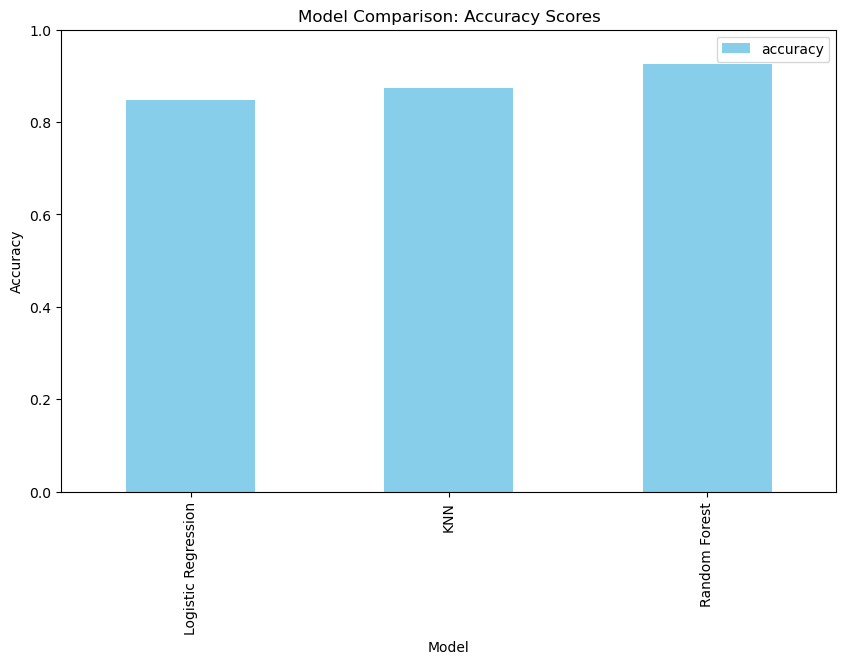

In [33]:
# Create a DataFrame to compare model scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# Transpose the DataFrame and plot the bar chart
model_compare.T.plot(kind="bar", figsize=(10, 6), color="skyblue")

# Adding labels and title for better clarity
plt.title("Model Comparison: Accuracy Scores")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Setting y-axis limits to 0-1 for accuracy percentage

# Display the plot
plt.show()

Now we have got a baseline model...

Exploring Various Model Aspects:
In our analysis, we'll delve into the following aspects of the machine learning model:

1 Hyperparameter Tuning:

    Optimize the model's performance by fine-tuning its hyperparameters. We'll employ techniques such as Grid Search to achieve this.
2 Feature Importance:

    After training the model, we'll investigate the significance of each feature to gain insights into their contributions to the model's predictions.
3 Confusion Matrix:

    Evaluate the model's performance by examining the confusion matrix, providing a detailed breakdown of predicted and actual classifications.
4 Cross-Validation:

    Enhance the reliability of our model assessment by employing cross-validation techniques, ensuring robustness across different subsets of the data.
5 Precision, Recall, F1 Score, Classification Report:

    Delve into precision, recall, and F1 score metrics, providing a comprehensive classification report to assess the model's effectiveness.
6 ROC Curve and AUC:

    Explore the ROC curve and calculate the Area Under the Curve (AUC) to gauge the model's discriminatory ability in binary classification scenarios.

In [34]:
# Tuning KNN hyperparameter - n_neighbors

# Lists to store training and test scores
train_scores = []
test_scores = []

# Create a range of different values for n_neighbors
neighbors = range(1, 21)

# Instantiate KNN
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    # Set the current value of n_neighbors
    knn.set_params(n_neighbors=i)
    
    # Fit the KNN model to the training data
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[1.0,
 0.9021005251312828,
 0.9009752438109527,
 0.886721680420105,
 0.8889722430607652,
 0.885596399099775,
 0.886721680420105,
 0.8810952738184546,
 0.8833458364591148,
 0.8792198049512379,
 0.8792198049512379,
 0.8795948987246812,
 0.8792198049512379,
 0.8777194298574643,
 0.8777194298574643,
 0.8758439609902475,
 0.8765941485371342,
 0.8754688672168042,
 0.8758439609902475,
 0.8747186796699175]

In [36]:
test_scores

[0.8035982008995503,
 0.8575712143928036,
 0.8500749625187406,
 0.8680659670164917,
 0.8740629685157422,
 0.8665667166416792,
 0.8740629685157422,
 0.8680659670164917,
 0.8755622188905547,
 0.8710644677661169,
 0.8710644677661169,
 0.8680659670164917,
 0.8695652173913043,
 0.8665667166416792,
 0.8725637181409296,
 0.863568215892054,
 0.8710644677661169,
 0.8695652173913043,
 0.8755622188905547,
 0.8725637181409296]

Maximum KNN score on the test data: 87.56%


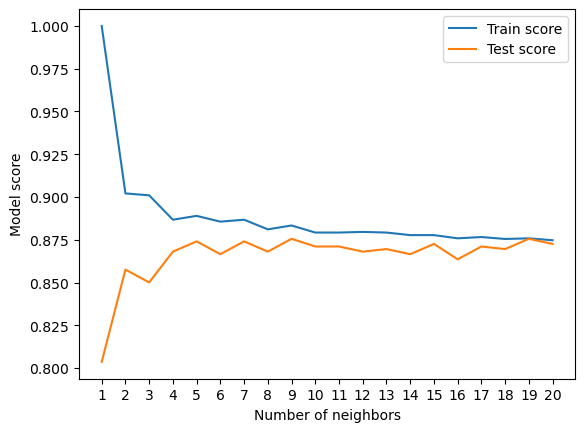

In [37]:
# Plotting training and test scores for different values of n_neighbors
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")

# Customize the plot
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

# Display the maximum KNN score on the test data
max_test_score = max(test_scores) * 100
print(f"Maximum KNN score on the test data: {max_test_score:.2f}%")

# Hyperparameter tunning with RandomizedSearchCV


We are going to tune:

    * LogisticRegression()
    
    * RandomForestClassifier()
    
    using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [39]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [41]:
rs_log_reg.score(X_test,y_test)

0.8515742128935532

In [42]:
# Get the best hyperparameters
best_params_log_reg = rs_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_reg)

# Evaluate the best model on the test set
test_score_log_reg = rs_log_reg.score(X_test, y_test)
print(f"Test Accuracy of the Best Logistic Regression Model: {test_score_log_reg * 100:.2f}%")

Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'C': 0.615848211066026}
Test Accuracy of the Best Logistic Regression Model: 85.16%


In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [45]:
rs_rf.score(X_test,y_test)

0.9325337331334332

In [46]:
# Get the best hyperparameters
best_params_rf = rs_rf.best_params_
print("Best Hyperparameters for RandomForestClassifier:", best_params_rf)

# Evaluate the best model on the test set
test_score_rf = rs_rf.score(X_test, y_test)
print(f"Test Accuracy of the Best RandomForestClassifier Model: {test_score_rf * 100:.2f}%")

Best Hyperparameters for RandomForestClassifier: {'n_estimators': 510, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': None}
Test Accuracy of the Best RandomForestClassifier Model: 93.25%


## Hyperparameter Tuning with GridSearchCV

In [47]:
log_reg_grid = {"C": np.logspace(-4,4,25),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_reg.best_params_

{'C': 2.154434690031882, 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(X_test, y_test)

0.8590704647676162

In [52]:
# Get the best hyperparameters
best_params_log_reg = gs_log_reg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_log_reg)

# Evaluate the best model on the test set
test_score_log_reg = gs_log_reg.score(X_test, y_test)
print(f"Test Accuracy of the Best Logistic Regression Model: {test_score_log_reg * 100:.2f}%")

Best Hyperparameters for Logistic Regression: {'C': 2.154434690031882, 'solver': 'liblinear'}
Test Accuracy of the Best Logistic Regression Model: 85.91%


In [53]:
model_scores

{'Logistic Regression': 0.8470764617691154,
 'KNN': 0.8740629685157422,
 'Random Forest': 0.9265367316341829}

## Evaluting our tunned machince learning classifier.

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score


In [54]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.score(X_test,y_test)

0.9250374812593704

In [61]:
y_predict = rs_rf.predict(X_test)

In [62]:
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [60]:
y_test

438     0
2674    0
1345    1
1957    0
2148    0
       ..
2577    0
2763    0
3069    0
1468    0
582     0
Name: Churn, Length: 667, dtype: int64

In [63]:
print(confusion_matrix(y_test, y_predict))

[[556  10]
 [ 40  61]]


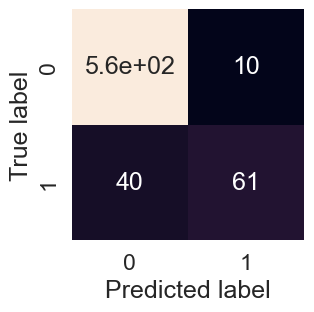

In [65]:
sns.set(font_scale = 1.5)

def plot_conf_mat(Y_test, Y_predict):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predict),
                    annot=True,
                    cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
plot_conf_mat(y_test, y_predict)
    

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.60      0.71       101

    accuracy                           0.93       667
   macro avg       0.90      0.79      0.83       667
weighted avg       0.92      0.93      0.92       667



In [67]:
clf = RandomForestClassifier(n_estimators=510,
                            min_samples_split=14,
                            min_samples_leaf=1,
                            max_depth=None)

In [68]:
# Cross_validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.93853073, 0.92653673, 0.94452774, 0.93543544, 0.95045045])

In [69]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9390962176569373

In [70]:
cv_f1= cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7580373867600774

In [75]:


def get_inputs():
    inputs = []
    user_input = input("Enter number of weeks for the account: ")
    inputs.append(user_input)
    user_input = input("Enter contractRenewal Status for the customer (1 for yes, 0 for no): ")
    inputs.append(user_input)
    user_input = input("Enter data plan (1 if customer has data plan, 0 if not DataUsage): ")
    inputs.append(user_input)
    user_input = input("Enter gigabytes of monthly data usage: ")
    inputs.append(user_input)
    user_input = input("Enter number of calls into customer service: ")
    inputs.append(user_input)
    user_input = input("Enter daytime minutes per month: ")
    inputs.append(user_input)
    user_input = input("Enter average number of daytime calls: ")
    inputs.append(user_input)
    user_input = input("Enter average monthly bill: ")
    inputs.append(user_input)
    user_input = input("Enter largest overage fee in the last 12 months: ")
    inputs.append(user_input)
    user_input = input("Enter average number of roaming minutes: ")
    inputs.append(user_input)
    return inputs

# Uncomment the line below if you want to get inputs from the user
# inputs = get_inputs()

# Creating a Pandas Series from user inputs
user_input_data = pd.Series(get_inputs(), dtype=float)  # Adjust dtype as needed

# Make predictions
user_input_pre = rs_rf.predict(user_input_data.values.reshape(1, -1))

# Print the predictions
print("Predicted Churn Status:", user_input_pre)

Enter number of weeks for the account: 1
Enter contractRenewal Status for the customer (1 for yes, 0 for no): 0
Enter data plan (1 if customer has data plan, 0 if not DataUsage): 1
Enter gigabytes of monthly data usage: 20
Enter number of calls into customer service: 1
Enter daytime minutes per month: 20
Enter average number of daytime calls: 50
Enter average monthly bill: 30
Enter largest overage fee in the last 12 months: 15
Enter average number of roaming minutes: 20
Predicted Churn Status: [1]


C:\Users\heych\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
